# *Лабораторна робота №5.*
# *По темі : Пакет Tensorflow*
***


## **Виконав:** 
* ## Студент 4 курсу
* ## Группи АнД-41
* ## Сірий Артем Олександрович
* ## Варінат №11

***

## *Завдання :*
## 1. Виконати вирішення задачs класифікації для 3 класів з набору даних food101 з використанням різних моделей нейронних мереж:
* ## CNN модель з лабораторної роботи 4
* ## Resnet модель
* ## Efficientnet модель (моделі 1.1-1.3 з використанням оптимізатора Adam)
* ## Моделі 1.2,1.3 з використанням оптимізатора SGD.
## 2. Індекси класів визначити індивідуально за залежностями: i1=n-1,i2=n+29,i3=n+59 (де і1,і2,і3 - індекс класу (починаючи з 0) у відсортованому за алфавітом наборі даних, n - номер за списком групи. 
## Класи : i1=11-1=10 , i2=11+29=40 , i3=11+59=70
## 3. Порівняти результати моделювання із використанням TensorBoard
## 4. Графік(и) порівняння результатів завантажити у форматі .svg та вставити у підсумковий файл поряд із та відповідними висновками
## 5. Результати оформити у вигляді файлу з кодом для моделювання та візуалізації у форматі .ipynb
## 6. Результати викласти у репозиторії GitHub (папка Lab5).
## 7. Підготуватися до захисту лабораторрної роботи (пояснення коду, відповіді на запитання за темою)

***

In [63]:
import tensorflow as tf
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import pandas as pd
import numpy as np
import os
import pathlib
import random
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense
from tensorflow.keras.losses import mae, mse
from tensorflow.keras.optimizers import SGD, Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import TensorBoard
from sklearn.pipeline import Pipeline

## Імпортуємо класи

In [2]:
data_folder_bruschetta = pathlib.Path("../Lab4/train/")
class_names = np.array(sorted([item.name for item in data_folder_bruschetta.glob('*')]))
print(class_names)

['bruschetta' 'grilled_salmon' 'pad_thai']


In [3]:
def view_random_image(target_dir, target_class):
  # Setup target directory (we'll view images from here)
  target_folder = target_dir+target_class

  # Get a random image path
  random_image = random.sample(os.listdir(target_folder), 1)

  # Read in the image and plot it using matplotlib
  img = mpimg.imread(target_folder + "/" + random_image[0])
  plt.imshow(img)
  plt.title(target_class,color='white')
  plt.axis("off")

  print(f"Image shape: {img.shape}") # show the shape of the image

  return img

## Виведемо 10 рандомних фото

Image shape: (512, 512, 3)
Image shape: (384, 512, 3)
Image shape: (512, 512, 3)
Image shape: (384, 512, 3)
Image shape: (512, 512, 3)
Image shape: (512, 384, 3)
Image shape: (512, 512, 3)
Image shape: (306, 512, 3)
Image shape: (512, 512, 3)
Image shape: (384, 512, 3)


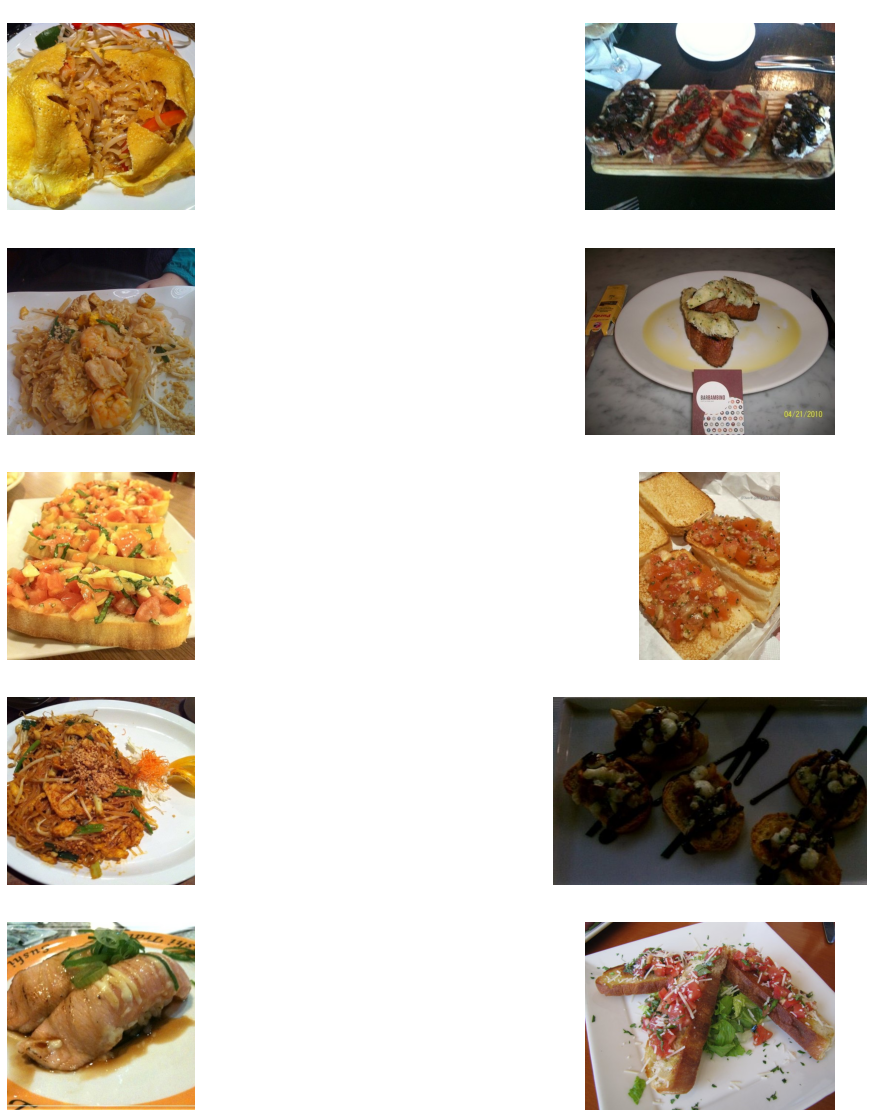

In [4]:
foo = ["bruschetta", "grilled_salmon", "pad_thai"] 
secure_random = random.SystemRandom()
plt.figure(figsize=(20,20))
for p in range(10):
    foo_choice = secure_random.choice(foo)
    plt.subplot(5,2,p+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid('off')
    plt.imshow(view_random_image(target_dir="../Lab4/train/", target_class=foo_choice))
    

In [5]:
tf.random.set_seed(11)

# Зведення до бінарного виду (чорно-білого)
train_datagen = ImageDataGenerator(rescale=1./255)
valid_datagen = ImageDataGenerator(rescale=1./255)

train_dir = "../Lab4/train/"
test_dir = "../Lab4/test/"

train_data = train_datagen.flow_from_directory(test_dir,
                                               batch_size=32, # number of images to process at a time 
                                               target_size=(224, 224), # convert all images to be 224 x 224
                                               class_mode='categorical',
                                               seed=11)

valid_data = valid_datagen.flow_from_directory(train_dir,
                                               batch_size=32,
                                               target_size=(224, 224),
                                               class_mode='categorical',
                                               seed=11)

Found 750 images belonging to 3 classes.
Found 225 images belonging to 3 classes.


In [29]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import tensorflow_hub as hub
IMAGE_SHAPE=(224,224)

def create_tensorboard_callback(dir_name, experiment_name):
  log_dir = dir_name + "/" + experiment_name + "/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
  tensorboard_callback = tf.keras.callbacks.TensorBoard(
      log_dir=log_dir
  )
  print(f"Saving TensorBoard log files to: {log_dir}")
  return tensorboard_callback

## CNN model

In [7]:
model_1 = Sequential([
  Conv2D(10, 3, activation='relu', input_shape=(224, 224, 3)),
  Conv2D(10, 3, activation='relu'),
  MaxPool2D(),
  Conv2D(10, 3, activation='relu'),
  Conv2D(10, 3, activation='relu'),
  MaxPool2D(),
  Flatten(),
  Dense(3, activation='softmax') 
])

model_1.compile(loss="categorical_crossentropy",
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                metrics=["accuracy"])

import datetime
log_dir = "logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)

history_1 = model_1.fit(train_data,
                        epochs=7,
                        steps_per_epoch=len(train_data),
                        validation_data=valid_data,
                        validation_steps=len(valid_data),
                        callbacks=[create_tensorboard_callback(dir_name="Lab5", experiment_name="CNN")])

Saving TensorBoard log files to: Lab5/CNN/20211117-202357
Epoch 1/7
24/24 [==============================] - 17s 681ms/step - loss: 1.1530 - accuracy: 0.3493 - val_loss: 1.1088 - val_accuracy: 0.3333
Epoch 2/7
24/24 [==============================] - 15s 612ms/step - loss: 1.0961 - accuracy: 0.3320 - val_loss: 1.0998 - val_accuracy: 0.3333
Epoch 3/7
24/24 [==============================] - 15s 614ms/step - loss: 1.0958 - accuracy: 0.3667 - val_loss: 1.0956 - val_accuracy: 0.4089
Epoch 4/7
24/24 [==============================] - 15s 617ms/step - loss: 1.0878 - accuracy: 0.4267 - val_loss: 1.0908 - val_accuracy: 0.3600
Epoch 5/7
24/24 [==============================] - 15s 617ms/step - loss: 1.0598 - accuracy: 0.4747 - val_loss: 1.0631 - val_accuracy: 0.4444
Epoch 6/7
24/24 [==============================] - 15s 618ms/step - loss: 0.9712 - accuracy: 0.5227 - val_loss: 1.1153 - val_accuracy: 0.4356
Epoch 7/7
24/24 [==============================] - 15s 614ms/step - loss: 0.8701 - accurac

In [8]:
model_1.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 222, 222, 10)      280       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 220, 220, 10)      910       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 110, 110, 10)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 108, 108, 10)      910       
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 106, 106, 10)      910       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 53, 53, 10)        0         
_________________________________________________________________
flatten (Flatten)            (None, 28090)             0

<AxesSubplot:>

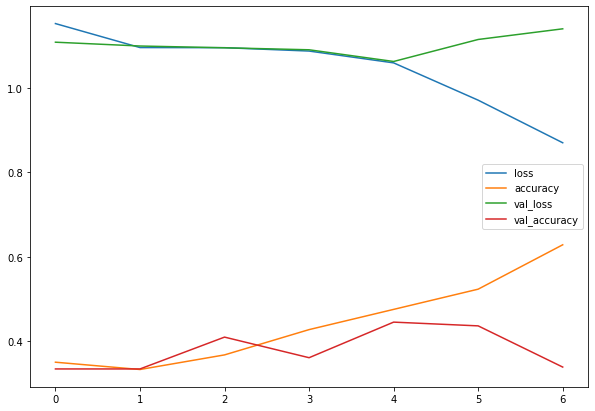

In [9]:
pd.DataFrame(history_1.history).plot(figsize=(10, 7))

In [28]:
%reload_ext tensorboard
%tensorboard --logdir='./Lab5/CNN/'

Reusing TensorBoard on port 6006 (pid 15064), started 0:00:20 ago. (Use '!kill 15064' to kill it.)

In [68]:
model_1_results = pd.DataFrame(history_1.history)

In [30]:
resnet_url="https://tfhub.dev/google/imagenet/resnet_v1_101/feature_vector/5"
efficientnet_url="https://tfhub.dev/tensorflow/efficientnet/b0/feature-vector/1"

def create_BC_model(model_url):
  # Download the pretrained model and save it as a Keras layer
  feature_extractor_layer = hub.KerasLayer(model_url,
                                           trainable=False, # freeze the underlying patterns
                                           name='feature_extraction_layer',
                                           input_shape=IMAGE_SHAPE+(3,)) # define the input image shape
  
  # Create our own model
  model = tf.keras.Sequential([
    feature_extractor_layer, # use the feature extraction layer as the base
    Dense(3, activation='sigmoid', name='output_layer') # create our own output layer      
  ])

  return model

## Resnet model

In [31]:
resnet_model= create_BC_model(resnet_url)
resnet_model.compile(
    loss="categorical_crossentropy", 
    optimizer=tf.keras.optimizers.Adam(), 
    metrics=['accuracy']
)
history_2 = resnet_model.fit(train_data, 
                epochs=7, 
                validation_data=valid_data, 
                callbacks=[create_tensorboard_callback(dir_name="Lab5", experiment_name="resnet")]
)

Saving TensorBoard log files to: Lab5/resnet/20211117-225112
Epoch 1/7
24/24 [==============================] - 47s 2s/step - loss: 0.7847 - accuracy: 0.6307 - val_loss: 0.4699 - val_accuracy: 0.8222
Epoch 2/7
24/24 [==============================] - 42s 2s/step - loss: 0.3144 - accuracy: 0.8747 - val_loss: 0.3914 - val_accuracy: 0.8489
Epoch 3/7
24/24 [==============================] - 41s 2s/step - loss: 0.2457 - accuracy: 0.9107 - val_loss: 0.3779 - val_accuracy: 0.8400
Epoch 4/7
24/24 [==============================] - 42s 2s/step - loss: 0.2160 - accuracy: 0.9280 - val_loss: 0.3758 - val_accuracy: 0.8489
Epoch 5/7
24/24 [==============================] - 42s 2s/step - loss: 0.1889 - accuracy: 0.9360 - val_loss: 0.3613 - val_accuracy: 0.8578
Epoch 6/7
24/24 [==============================] - 42s 2s/step - loss: 0.1547 - accuracy: 0.9493 - val_loss: 0.3668 - val_accuracy: 0.8622
Epoch 7/7
24/24 [==============================] - 41s 2s/step - loss: 0.1387 - accuracy: 0.9613 - val_lo

In [32]:
resnet_model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
feature_extraction_layer (Ke (None, 2048)              42605504  
_________________________________________________________________
output_layer (Dense)         (None, 3)                 6147      
Total params: 42,611,651
Trainable params: 6,147
Non-trainable params: 42,605,504
_________________________________________________________________


<AxesSubplot:>

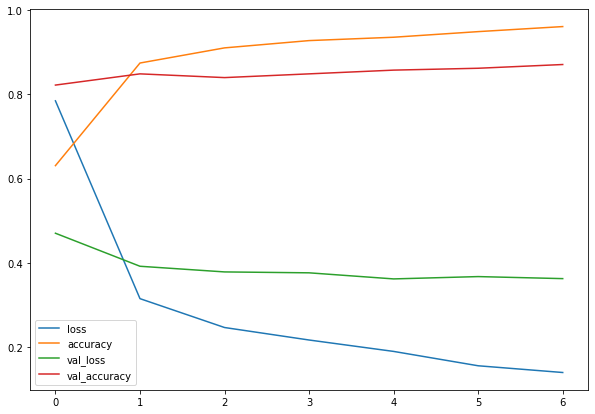

In [33]:
pd.DataFrame(history_2.history).plot(figsize=(10, 7))

In [35]:
%reload_ext tensorboard
%tensorboard --logdir='./Lab5/resnet/'

Reusing TensorBoard on port 6006 (pid 18100), started 0:00:13 ago. (Use '!kill 18100' to kill it.)

In [71]:
resnet_results = pd.DataFrame(history_2.history)

## Efficientnet model

In [36]:
efficientnet_model= create_BC_model(efficientnet_url)
efficientnet_model.compile(
    loss="categorical_crossentropy", 
    optimizer=tf.keras.optimizers.Adam(), 
    metrics=['accuracy']
)
history_3 = efficientnet_model.fit(train_data, 
                epochs=7, 
                validation_data=valid_data, 
                callbacks=[create_tensorboard_callback(dir_name="Lab5", experiment_name="efficientnet")]
)

Saving TensorBoard log files to: Lab5/efficientnet/20211117-225950
Epoch 1/7
24/24 [==============================] - 27s 917ms/step - loss: 0.6935 - accuracy: 0.7680 - val_loss: 0.4846 - val_accuracy: 0.8622
Epoch 2/7
24/24 [==============================] - 20s 830ms/step - loss: 0.3492 - accuracy: 0.9160 - val_loss: 0.3419 - val_accuracy: 0.9022
Epoch 3/7
24/24 [==============================] - 19s 797ms/step - loss: 0.2599 - accuracy: 0.9373 - val_loss: 0.2950 - val_accuracy: 0.9022
Epoch 4/7
24/24 [==============================] - 19s 813ms/step - loss: 0.2180 - accuracy: 0.9440 - val_loss: 0.2661 - val_accuracy: 0.9111
Epoch 5/7
24/24 [==============================] - 19s 802ms/step - loss: 0.1922 - accuracy: 0.9480 - val_loss: 0.2483 - val_accuracy: 0.9156
Epoch 6/7
24/24 [==============================] - 20s 819ms/step - loss: 0.1721 - accuracy: 0.9493 - val_loss: 0.2379 - val_accuracy: 0.9200
Epoch 7/7
24/24 [==============================] - 19s 809ms/step - loss: 0.1574 

In [37]:
efficientnet_model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
feature_extraction_layer (Ke (None, 1280)              4049564   
_________________________________________________________________
output_layer (Dense)         (None, 3)                 3843      
Total params: 4,053,407
Trainable params: 3,843
Non-trainable params: 4,049,564
_________________________________________________________________


<AxesSubplot:>

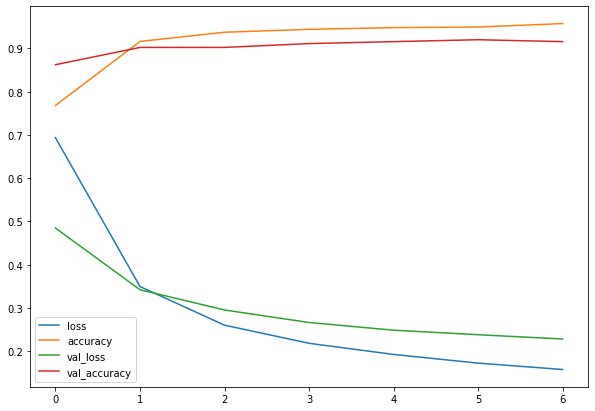

In [38]:
pd.DataFrame(history_3.history).plot(figsize=(10, 7))

In [40]:
%reload_ext tensorboard
%tensorboard --logdir='./Lab5/efficientnet/'

Reusing TensorBoard on port 6006 (pid 18028), started 0:00:19 ago. (Use '!kill 18028' to kill it.)

In [79]:
efficientnet_results = pd.DataFrame(history_3.history)

## Resnet + sgd

In [41]:
resnet_model2= create_BC_model(resnet_url)
resnet_model2.compile(
    loss="categorical_crossentropy", 
    optimizer=tf.keras.optimizers.SGD(learning_rate=0.01), 
    metrics=['accuracy']
)
history_4 = resnet_model2.fit(train_data, 
                epochs=7, 
                validation_data=valid_data, 
                callbacks=[create_tensorboard_callback(dir_name="Lab5", experiment_name="resnet_sgd")]
)

Saving TensorBoard log files to: Lab5/resnet_sgd/20211117-230258
Epoch 1/7
24/24 [==============================] - 51s 2s/step - loss: 0.6080 - accuracy: 0.7493 - val_loss: 0.4484 - val_accuracy: 0.8400
Epoch 2/7
24/24 [==============================] - 44s 2s/step - loss: 0.3826 - accuracy: 0.8453 - val_loss: 0.4239 - val_accuracy: 0.8178
Epoch 3/7
24/24 [==============================] - 43s 2s/step - loss: 0.2714 - accuracy: 0.8933 - val_loss: 0.3829 - val_accuracy: 0.8489
Epoch 4/7
24/24 [==============================] - 45s 2s/step - loss: 0.2459 - accuracy: 0.8973 - val_loss: 0.3835 - val_accuracy: 0.8533
Epoch 5/7
24/24 [==============================] - 46s 2s/step - loss: 0.2588 - accuracy: 0.9027 - val_loss: 0.4093 - val_accuracy: 0.8489
Epoch 6/7
24/24 [==============================] - 45s 2s/step - loss: 0.2073 - accuracy: 0.9147 - val_loss: 0.3569 - val_accuracy: 0.8622
Epoch 7/7
24/24 [==============================] - 47s 2s/step - loss: 0.1863 - accuracy: 0.9320 - va

In [43]:
%reload_ext tensorboard
%tensorboard --logdir='./Lab5/resnet_sgd/'

Reusing TensorBoard on port 6006 (pid 15752), started 0:00:18 ago. (Use '!kill 15752' to kill it.)

In [78]:
resnet_sgd_results = pd.DataFrame(history_4.history)

## Efficientnet + sgd

In [44]:
efficientnet_model2= create_BC_model(efficientnet_url)
efficientnet_model2.compile(
    loss="categorical_crossentropy", 
    optimizer=tf.keras.optimizers.SGD(learning_rate=0.01), 
    metrics=['accuracy']
)
history_5 = efficientnet_model2.fit(train_data, 
                epochs=7, 
                validation_data=valid_data, 
                callbacks=[create_tensorboard_callback(dir_name="Lab5", experiment_name="efficientnet_sgd")]
)

Saving TensorBoard log files to: Lab5/efficientnet_sgd/20211117-230901
Epoch 1/7
24/24 [==============================] - 28s 988ms/step - loss: 0.8482 - accuracy: 0.6413 - val_loss: 0.6822 - val_accuracy: 0.7644
Epoch 2/7
24/24 [==============================] - 21s 868ms/step - loss: 0.5691 - accuracy: 0.8640 - val_loss: 0.5269 - val_accuracy: 0.8400
Epoch 3/7
24/24 [==============================] - 20s 826ms/step - loss: 0.4515 - accuracy: 0.9040 - val_loss: 0.4494 - val_accuracy: 0.8800
Epoch 4/7
24/24 [==============================] - 19s 803ms/step - loss: 0.3848 - accuracy: 0.9160 - val_loss: 0.3999 - val_accuracy: 0.8844
Epoch 5/7
24/24 [==============================] - 19s 796ms/step - loss: 0.3417 - accuracy: 0.9267 - val_loss: 0.3681 - val_accuracy: 0.8933
Epoch 6/7
24/24 [==============================] - 19s 807ms/step - loss: 0.3111 - accuracy: 0.9307 - val_loss: 0.3455 - val_accuracy: 0.9022
Epoch 7/7
24/24 [==============================] - 20s 820ms/step - loss: 0.2

In [46]:
%reload_ext tensorboard
%tensorboard --logdir='./Lab5/efficientnet_sgd/'

Reusing TensorBoard on port 6006 (pid 14620), started 0:00:22 ago. (Use '!kill 14620' to kill it.)

In [80]:
efficientnet_sgd_results = pd.DataFrame(history_5.history)

In [112]:
all_models_results = pd.concat([model_1_results, resnet_results,efficientnet_results,resnet_sgd_results,efficientnet_sgd_results])

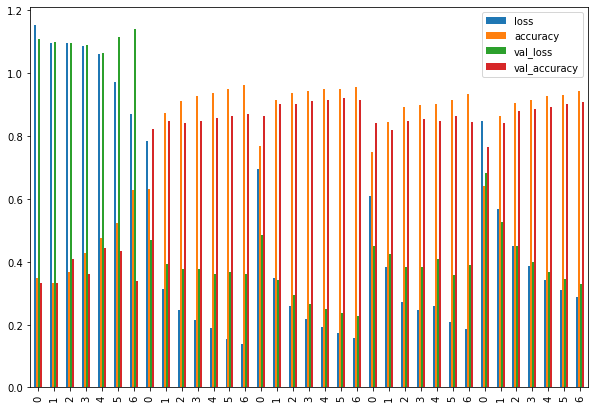

In [113]:
all_models_results.plot(kind="bar", figsize=(10, 7)).legend(bbox_to_anchor=(1.0, 1.0))

***
# *Висновок*
***
## *В ході виконання лаборатоної роботи було використано бібліотеку з набором фотографій їжі. До варіанту відносились брускети, риба та паста.*
## *Загальна кількість вибірки 975 екземплярів. З них 750 на тестову вибірку та 225 на валідаційну. Класи розподілені рівномірно за кількістю.*
## *Провевши моделювання 5-ти моделей, було виявлено, що efficientnet з оптимайзером Adam відпрацювала найбільш успішно з поміж усіх. У порівнянні з оптимайзером SGD має кращі значення.*
## *Модель resnet показала також високу точність, проте різниця оптимізаційних функцій є досить малою.*
## *Щож до моделі CNN, вона є досить поганою у порівнянні з конкурентами.*